# Lista 03 - Tópicos III

In [1]:
from keras import layers
from keras import models
from keras import losses
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #class integet to binary class matrix.
test_labels = to_categorical(test_labels)

## Train, validate and test

In [3]:
X_train = train_images[:24000]
X_train_labels = train_labels[:24000]

X_valid = train_images[24000:28000]
X_valid_labels= train_labels[24000:28000]

X_test = test_images[:4000]
X_test_labels = test_labels[:4000]

## Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units= 64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

## Loss and optimizers choosen

In [6]:
loss_functions = ['mean_squared_error', 'mean_absolute_error', 'mean_squared_logarithmic_error']
optimizers_l = ['sgd', 'rmsprop', 'adagrad']

In [7]:
import time
history_loss_x_opt = []

for i in loss_functions:
    for j in optimizers_l:
        model.compile(optimizer=j, loss=i,metrics=['accuracy'])
        start_time = time.time()
        history = model.fit(X_train, X_train_labels, epochs=40, batch_size=64, validation_data=(X_valid, X_valid_labels), verbose=0)        
        print('time: {0:.2f}'.format(time.time() - start_time))
        history_loss_x_opt.append((history, i, j))     
        print('finished: {}, {}'.format(i, j))

time: 272.78
finished: mean_squared_error, sgd
time: 269.74
finished: mean_squared_error, rmsprop
time: 258.51
finished: mean_squared_error, adagrad
time: 265.01
finished: mean_absolute_error, sgd
time: 278.85
finished: mean_absolute_error, rmsprop
time: 273.65
finished: mean_absolute_error, adagrad
time: 268.42
finished: mean_squared_logarithmic_error, sgd
time: 278.76
finished: mean_squared_logarithmic_error, rmsprop
time: 276.44
finished: mean_squared_logarithmic_error, adagrad


## Accuracy and loss for each model (item 1)

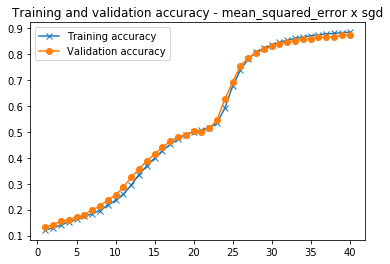

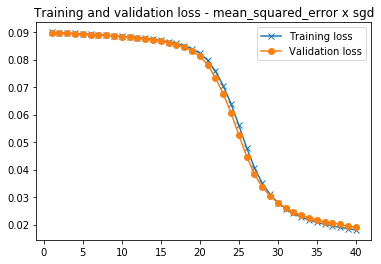

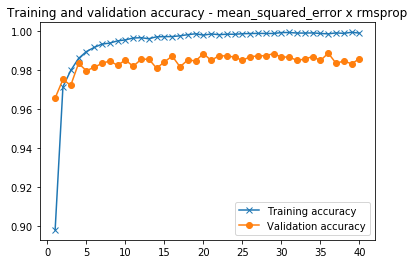

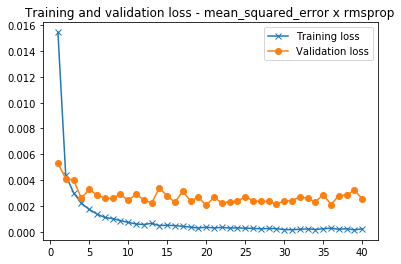

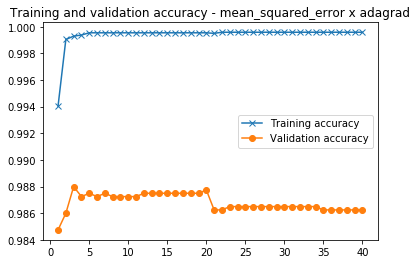

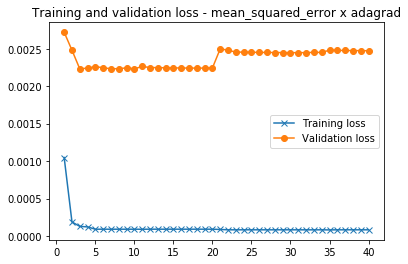

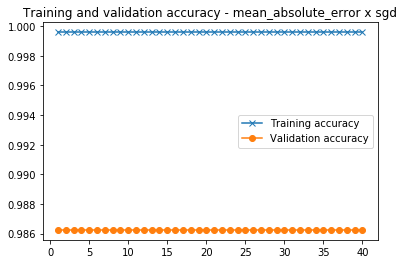

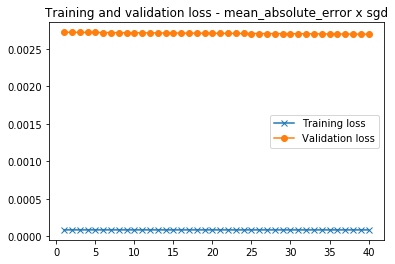

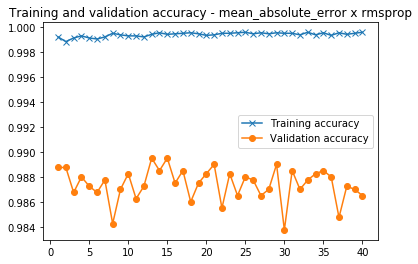

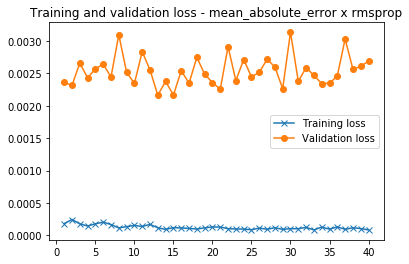

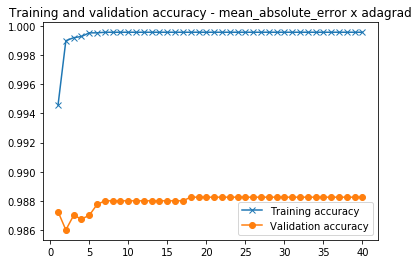

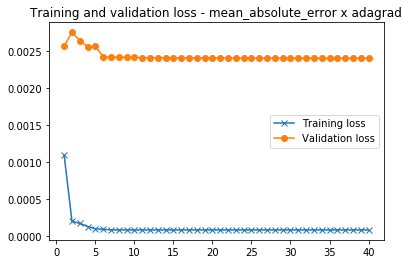

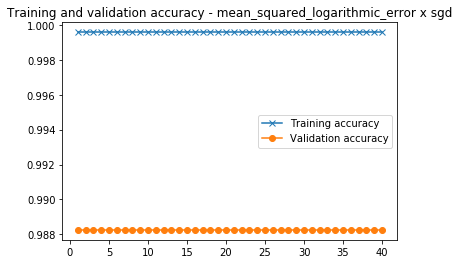

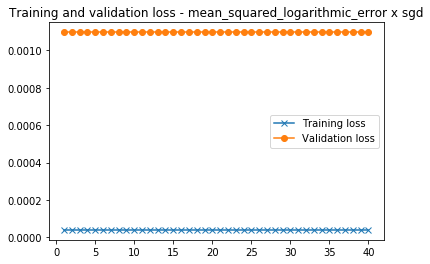

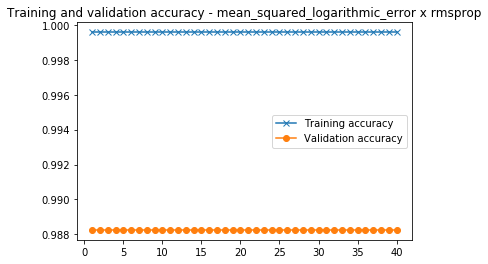

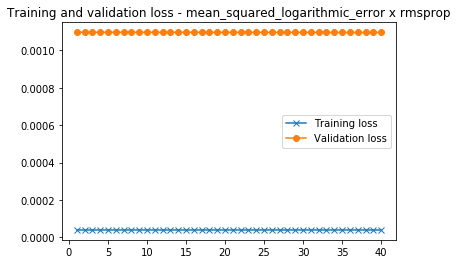

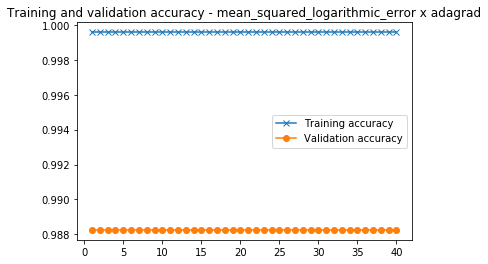

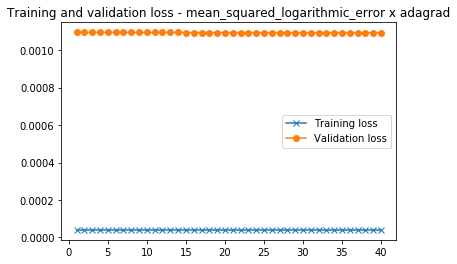

In [8]:
for history_, loss_, opt_ in history_loss_x_opt:
    acc = history_.history['acc']
    val_acc = history_.history['val_acc']
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, label='Training accuracy', marker='x')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.title('Training and validation accuracy - {} x {}'.format(loss_, opt_))
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, label='Training loss', marker='x')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.title('Training and validation loss - {} x {}'.format(loss_, opt_))
    plt.legend()
    
    plt.show()